<a href="https://colab.research.google.com/github/MAristyaP/Mesin_Learning2023/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks

1. Create a classification model using SVM for the voice.csv data.

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data with specific encoding due data doesn't use utf-8 encoding
df = pd.read_csv('/content/voice.csv', encoding='latin-1')

# Check
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
data = pd.read_csv('/content/voice.csv')
data['label'] = data['label'].map({'male': 0, 'female': 1})

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{confusion}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.94
Confusion Matrix:
[[332   5]
 [ 32 265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       337
           1       0.98      0.89      0.93       297

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



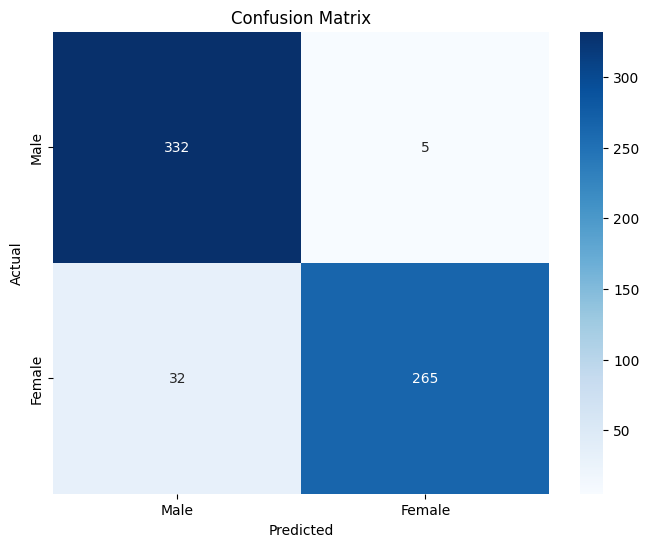

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. Create a Multinomial Naive Bayes classification model with the following conditions:

A. Use the voice.csv data.

B. Utilize CountVectorizer with stop words enabled.

C. Evaluate the results.

In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('/content/spam.csv', encoding='latin-1')


df = df[['v1', 'v2']]


df.columns = ['Labels', 'SMS']

df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})


X = df['SMS']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = CountVectorizer(stop_words='english')


X_train_vec = vectorizer.fit_transform(X_train)


X_test_vec = vectorizer.transform(X_test)


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)


y_pred = nb_classifier.predict(X_test_vec)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy: 0.98

Confusion Matrix:
[[959   6]
 [ 12 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



3. Create another Multinomial Naive Bayes classification model with the following conditions:

A. Use the spam.csv data.
B. Employ TF-IDF features with stop words enabled.
C. Evaluate the results and compare them with the results from Task #2.
D. Provide a conclusion on which feature extraction method is best for the spam.csv dataset.

In [6]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['Labels', 'SMS']
df['Labels'] = df['Labels'].map({'spam': 1, 'ham': 0})


X = df['SMS']
y = df['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


y_pred_tfidf = nb_classifier.predict(X_test_tfidf)


accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
class_report_tfidf = classification_report(y_test, y_pred_tfidf)


print("Results for TF-IDF Features:")
print(f'Accuracy: {accuracy_tfidf:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix_tfidf)
print('\nClassification Report:')
print(class_report_tfidf)


print("\nResults for CountVectorizer Features:")
print(f'Accuracy (CountVectorizer): {accuracy:.2f}')
print('\nConfusion Matrix (CountVectorizer):')
print(conf_matrix)
print('\nClassification Report (CountVectorizer):')
print(class_report)

print("\nConclusion:")
if accuracy_tfidf > accuracy:
    print("Using TF-IDF features with stop words enabled performs better.")
else:
    print("Using CountVectorizer with stop words enabled performs better.")

Results for TF-IDF Features:
Accuracy: 0.97

Confusion Matrix:
[[965   0]
 [ 37 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Results for CountVectorizer Features:
Accuracy (CountVectorizer): 0.98

Confusion Matrix (CountVectorizer):
[[959   6]
 [ 12 138]]

Classification Report (CountVectorizer):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Conclusion:
Using CountVectorizer with stop words enabled per